# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БВТ2005 Мокин Александр
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| __Ковер Серпинского__
| Дерево Пифагора 

In [2]:
# Необходим при замере скорости выполнения кода
from datetime import datetime as t

### Выполнение:

In [30]:
import pygame as pg
from pygame.locals import *
from sys import exit

WIDTH = 2700
HEIGHT = 2700
SIDE_LEN = 2700
F_COLOR = (25, 255, 255)

deep_length = 0

def serpiensky_carpet(screen, level,side = SIDE_LEN, pos_x = 0, pos_y = 0):
    global deep_length
    if level and side >= 1:
        new_side = side // 3
        square = (pos_x + new_side,pos_y + new_side, new_side, new_side)
        pg.draw.rect(screen, F_COLOR, square)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i != 0 or j != 0:
                    serpiensky_carpet(screen,level - 1,new_side, pos_x + new_side + new_side * i, pos_y + new_side + new_side * j)
    else:
        deep_length += 1 


def main(exe_time, level, deep_counter,is_testing = False):
    pg.init()
    pg.display.set_caption('Serpiensky carpet') 
    screen = pg.display.set_mode((WIDTH, HEIGHT))
    
    global deep_length
    deep_length = 0
    start = t.now()
    serpiensky_carpet(screen, level, side= SIDE_LEN)
    finish = t.now() - start
    exe_time.append(finish)
    deep_counter.append(deep_length)
    if is_testing:
        return
    while True:
        for event in pg.event.get():
            if event.type == pg.QUIT:
                pg.quit()
                exit()  
        if is_testing:
            pg.quit()
        pg.display.update()
        

limit = 7
exe_time = []
average_exe_time = []
deep_counter = []
for level in range(limit + 1):
    for i in range(limit):
        main(average_exe_time,level, deep_counter,True)
    summ = 0
    
    for i in range(limit):
        summ += int(average_exe_time[i].microseconds)
    
    exe_time.append(summ/limit)
    average_exe_time = []
    
deep_counter = []
for i in range(limit + 1):
    main(average_exe_time,i, deep_counter,True)

for i in range(limit + 1):
    print("Глубина {1:2d} время --- {0:9.2f} s --- глубина рекурсии {2}".format(exe_time[i], i,deep_counter[i]))



Глубина  0 время ---      0.00 s --- глубина рекурсии 1
Глубина  1 время ---   2285.43 s --- глубина рекурсии 8
Глубина  2 время ---   4422.43 s --- глубина рекурсии 64
Глубина  3 время ---   6553.00 s --- глубина рекурсии 512
Глубина  4 время ---  14691.57 s --- глубина рекурсии 4096
Глубина  5 время ---  45021.14 s --- глубина рекурсии 32768
Глубина  6 время --- 270076.86 s --- глубина рекурсии 262144
Глубина  7 время --- 432356.57 s --- глубина рекурсии 2097152


### Вывод

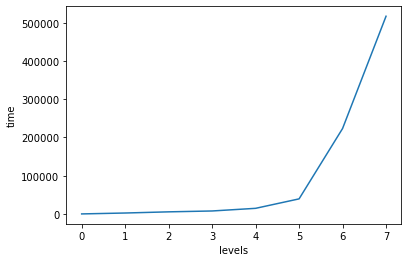

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,len(exe_time),1)
new_exe_time = []
y = np.array(exe_time)

plt.xlabel('levels')
plt.ylabel('time')
plt.plot(x,y)
plt.show()